# Using Python to caculate petrol engine parameters



In [55]:
import math
import matplotlib.pyplot as plt

In [56]:
# define a function to calculate the kinematics of engine

def kinematics_engine(stroke, bore, con_rod, rc, start_crank, end_crank):
    # geometric parameters
    a = stroke/2
    R = con_rod/a
    # volume parameters
    v_s = math.pi*(1/4)*pow(bore,2)*stroke
    v_c = v_s/(rc - 1)
    # angle of start of crank and angle of end of crank
    sc = math.radians(start_crank)
    ec = math.radians(end_crank)
    # Calculating the change in volume with crank angle 
    num_vals = 100
    dtheta = (ec - sc)/(num_vals - 1)
    V = []
    for i in range(0, num_vals):
        theta = sc + i*dtheta
        term_1 = 0.5*(rc-1)
        term_2 = R + 1 - math.cos(theta)
        term_3 = pow(R,2) - pow(math.sin(theta), 2)
        term_3 = pow(term_3, 0.5)
        V.append((1 + term_1*(term_2 - term_3))*v_c)
    return V

# Take values from user and calculate efficiency, plot P-V diagram
Sample values are: 

Initial Pressure = 101.325 kPa,
Initial Temperature = 500K,
Adiabatic coefficient = 1.4,
Temperature at combustion = 2300K,
Bore diameter = 0.1m, 
Stroke length = 0.1m,
length of connecting rod = 0.15m, 
pressure ratio (rc) = 8



In [57]:
# make the user input values 

p1 = input('Enter initial Pressure: ')
p1 = float(p1)
t1 = input('Enter initial Temperature: ')
t1 = float(t1)
gamma = input('Enter the value of adibatic constant: ')
gamma = float(gamma)
t3 = input("Enter max Temperature: ")
t3 = float(t3)

# engine geometric parameters

bore = input('Enter the cylinder diameter: ')
bore = float(bore)
stroke = input("Enter the lenght of stroke of cylinder: ")
stroke = float(stroke)
con_rod = input('Enter length of connecting rod: ')
con_rod = float(con_rod)
rc = input('Enter the value of pressure ratio: ')
rc = float(rc)

Enter initial Pressure: 101325
Enter initial Temperature: 300
Enter the value of adibatic constant: 1.4
Enter max Temperature: 3000
Enter the cylinder diameter: 0.1
Enter the lenght of stroke of cylinder: 0.2
Enter length of connecting rod: 0.2
Enter the value of pressure ratio: 9


In [58]:
# let us start by calculating the volume 

v_s = (math.pi/4)*pow(bore, 2)*stroke
print('volume of stroke is', v_s)
v_c = v_s/(rc - 1)
print('clearance volume is', v_c)
v1 = v_s + v_c
print('volume at state point 1, v1 is', v1)

# Process 1 to 2 is isentropic compression
# the values at state point 2 is calculated 

v2 = v_c
print('volume at state point 2, v2 is', v2)

# now we will calculate pressure at point 2 using the formula for adiabatic process
# p2v2^gamma = p1v1^gamma

p2 = p1*pow(v1, gamma)/pow(v2, gamma)

# now we will calculate temperature at this point using ideal gas formula
# p2v2/t2 = p1v1/t1; rhs = p2v2/t2; t2 = p2v2/rhs

rhs = p1*v1/t1
t2 = p2*v2/rhs
print('temperature at state point 2 is', t2)

# now we will compute the volume at points between state 1 and state 2 by calling the function defined earlier
# the volume values will be stored in a list

V_comp = kinematics_engine(stroke, bore, con_rod, rc, 180, 0)
const = p1*pow(v1, gamma)
P_comp = []
for v in V_comp:
    P_comp.append(const/pow(v, gamma))

volume of stroke is 0.0015707963267948969
clearance volume is 0.0001963495408493621
volume at state point 1, v1 is 0.0017671458676442589
volume at state point 2, v2 is 0.0001963495408493621
temperature at state point 2 is 722.4674055842074


In [59]:
# process 2 to 3 is constant volume heat addition
# values for state point 3 are calculated

v3 = v2     # constant volume process
print('volume at point 3 is', v3)

# using ideal gas equation to calculate pressure at point 3
# p2v2/t2 = p3v3/t3; let lhs = p2v2/t2

lhs = p2*v2/t2
p3 = lhs*t3/v3
print('pressure at point 3 is', p3)

volume at point 3 is 0.0001963495408493621
pressure at point 3 is 9119250.0


In [60]:
# Process 3 to 4 is isentropic expansion also known as the power stroke
# caculating values for state point 4

v4 = v1  # constant volume process
print('volume at state point 4 is =', v4)

# Caculating pressure at point 4 using the equation of adiabatic process
p4 = p3*pow(v3, gamma)/pow(v4, gamma)
print('pressure at point 4 is =', p4)

# now we will calculate temperature at state point 4 using ideal gas equation
# p3v3/t3 = p4v4/t4; rhs = p4v4/t4

rhs = p3*v3/t3
t4 = p4*v4/rhs
print('temperature at state point 4 is =', t4)

# now we will call the function defined earlier to caculate volume between points 3 and 4
# we will use the values of volume to caculate pressure between points 3 and 4

V_exp = kinematics_engine(stroke, bore, con_rod, rc, 0, 180)
const = p3*pow(v3, gamma)
P_exp = []
for v in V_exp:
    P_exp.append(const/pow(v, gamma))
    

volume at state point 4 is = 0.0017671458676442589
pressure at point 4 is = 420745.6248551411
temperature at state point 4 is = 1245.7309396155176


In [65]:
# caclulating Thermal efficiency of cycle

n = pow(pow(rc, (gamma - 1)), -1)
percentage_efficiency = (1 - n)*100
print('Thermal efficiency of the given engine is', percentage_efficiency)


Thermal efficiency of the given engine is 58.47563534614941


<Figure size 720x576 with 0 Axes>

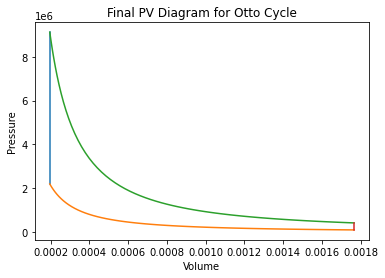

<Figure size 720x576 with 0 Axes>

In [62]:
# plotting of graph

plt.plot([v2, v3], [p2, p3])
# plotting the curve for compresssion process between points 1 and 2
plt.plot(V_comp, P_comp)
# plotting the curve for expansion process between points 3 and 4
plt.plot(V_exp, P_exp)
plt.plot([v4, v1], [p4, p1])
plt.title('Final PV Diagram for Otto Cycle')
plt.xlabel('Volume')
plt.ylabel('Pressure')
plt.figure(figsize = (10,8))

In [63]:
# Net work done
W_in = (p1*v1 - p2*v2)/(gamma - 1)
W_out = (p3*v3 - p4*v4)/(gamma - 1)
W_net = (W_out - W_in)/1000
print('The net work done by the engine is', W_net,'kJ')

The net work done by the engine is 3.24798203713339 kJ


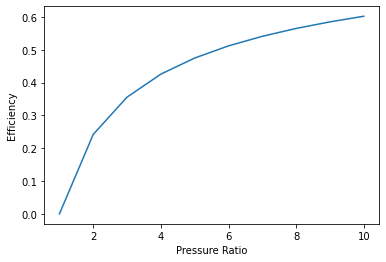

In [64]:
# variaion of efficiency with pressure ratio
efficiency = []
pressure_ratio = []
for i in range(1,11):
    k = 1 - pow(pow(i, (gamma - 1)), -1)
    efficiency.append(k)
    pressure_ratio.append(i)
plt.xlabel('Pressure Ratio')
plt.ylabel('Efficiency')
plt.plot(pressure_ratio, efficiency)
plt.show()